/Users/jekabsgritans/miniconda3/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


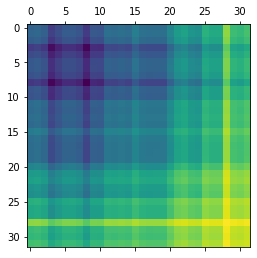

In [1]:
import torch
import torch.nn as nn
from dataset import ForexData
from torch.utils.data import DataLoader
from transforms import GAFTransform, scale, stretch
import torch.nn.functional as F
from torchvision.transforms import Normalize
SEQ_LENGTH = 32

dataset = ForexData(
    seq_length=SEQ_LENGTH,
    transforms=[scale, GAFTransform(), stretch]
)

import matplotlib.pyplot as plt
plt.matshow(dataset[0].numpy())

In [6]:
LATENT_DIM=128
BATCH_SIZE=64
EPOCHS=100

import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

from models import Critic, Generator

c = Critic(
    img_size=SEQ_LENGTH,
)

g = Generator(
    latent_dim=LATENT_DIM,
    img_size=SEQ_LENGTH,
)

import torch.optim as optim
c_optim = optim.Adam(c.parameters(), lr=1e-4, betas=(0.0,0.9))
g_optim = optim.Adam(g.parameters(), lr=1e-4, betas=(0.0,0.9))

from trainer import WGanTrainer
trainer = WGanTrainer(
    generator=g,
    critic=c,
    gen_optimizer=g_optim,
    critic_optimizer=c_optim,
    latent_dimension=LATENT_DIM,
    device=device,
)

data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
trainer.train(data_loader, EPOCHS)

Training...


Epoch [100/100]: 100%|██████████| 79/79 [00:00<00:00, 177.03it/s]


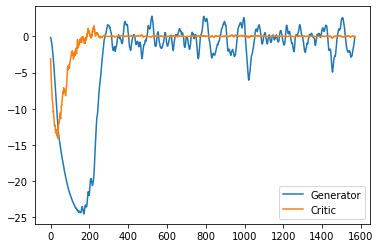

In [7]:
trainer.plot_losses()

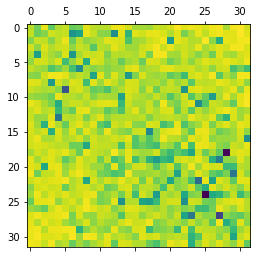

In [8]:
sample = trainer.sample(1)
plt.matshow(sample[0])


(array([  2.,   2.,   4.,   9.,  31.,  48.,  72., 106., 170., 580.]),
 array([0.8084952 , 0.8275372 , 0.84657913, 0.8656211 , 0.88466305,
        0.903705  , 0.9227469 , 0.94178885, 0.9608308 , 0.97987276,
        0.9989147 ], dtype=float32),
 <BarContainer object of 10 artists>)

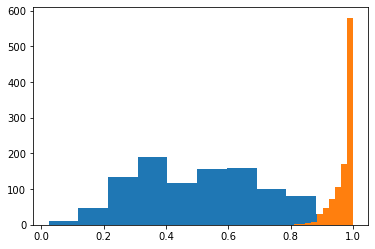

In [5]:
import matplotlib.pyplot as plt
real_data = dataset[0].numpy().reshape(-1)
fake_data = trainer.sample(1)[0].reshape(-1)
plt.hist(real_data)
plt.hist(fake_data)

In [24]:
import numpy as np

def shuffle_triangle(mat):
    n = mat.shape[0]
    mask = np.ones((n,n))
    for a in range(n):
        for b in range(a,n):
            mask[a,b] = 0

    shuffled = mat[mask]
    shuffled = np.random.shuffle(mat[mask])
    mat[mask] = shuffled[mask]

    return mat

mask = scramble_triangle(5)
mask = np.array(mask, dtype=bool)
arr = np.array(range(5))
mat = arr.reshape(-1,1)+arr
mat[mask] = = np.ones_like(mask)[mask]
mat

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7],
       [4, 5, 6, 7, 8]])

In [21]:
mask

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])